In [1]:
import numpy as np
import pandas as pd

from sklearn import cluster
from scipy.cluster import hierarchy

import matplotlib.pyplot as plt

import walsdata
from walsdata import s280d
import langmap

In [2]:
s280d.values_scaled_imputed

,1A,2A,3A,4A_2,4A_3,5A_1,5A_3,5A_4,6A_2,6A_3,...,143A_2,143A_3,143A_4,143A_6,143G_1,144A_1,144A_2,144A_3,144A_4,144A_5
Language_ID,,,,,,,,,,,,,,,,,,,,,
abi,0.25,0.5,0.50,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000
abk,1.00,0.0,1.00,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000
aco,1.00,0.5,1.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.196307,0.0,0.0,0.0,0.803693
aeg,0.75,0.5,0.75,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.000000
ain,0.00,0.5,0.25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yur,0.75,0.5,0.75,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000
zan,0.50,1.0,0.50,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.000000
zqc,0.25,0.5,0.25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000


### Baseline

Here, we check what hierarchical clustering looks like when there's no structure at all by randomizing the columns

In [3]:
shuffle280 = s280d.values_scaled_imputed.copy()

In [4]:
state = np.random.RandomState(280)
for col in shuffle280.columns:
    shuffle280[col] = state.permutation(shuffle280[col].values)

In [5]:
shuffle280

,1A,2A,3A,4A_2,4A_3,5A_1,5A_3,5A_4,6A_2,6A_3,...,143A_2,143A_3,143A_4,143A_6,143G_1,144A_1,144A_2,144A_3,144A_4,144A_5
Language_ID,,,,,,,,,,,,,,,,,,,,,
abi,0.25,1.0,0.75,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
abk,0.00,1.0,0.25,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
aco,0.25,0.5,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
aeg,0.50,1.0,0.75,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
ain,0.25,0.5,0.25,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yur,0.25,1.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
zan,0.25,0.5,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
zqc,0.75,0.5,0.25,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
shuffle_linkage = hierarchy.linkage(shuffle280, method='ward')

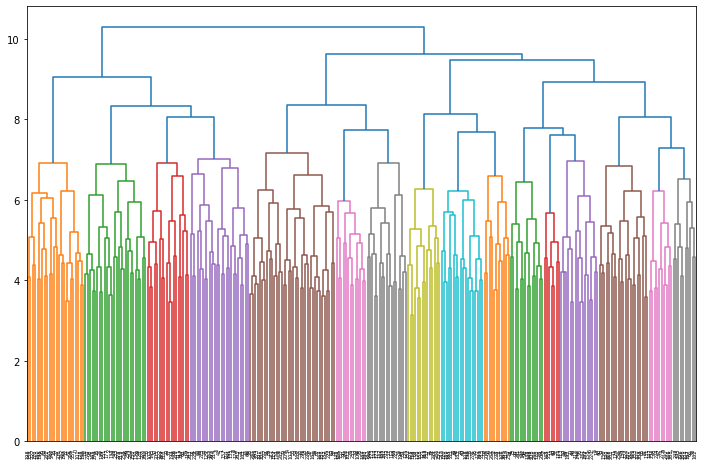

In [7]:
plt.subplots(figsize=(12, 8))
hierarchy.dendrogram(shuffle_linkage)
plt.show()

### Full cluster

In [8]:
linkage = hierarchy.linkage(s280d.values_scaled_imputed, method='ward')

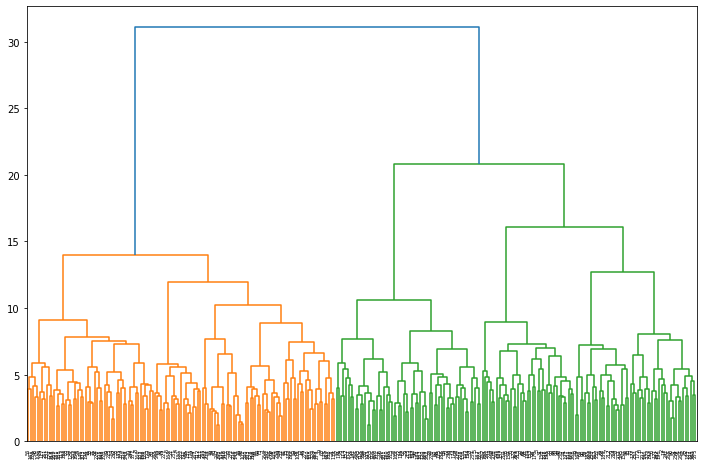

In [9]:
plt.subplots(figsize=(12, 8))
hierarchy.dendrogram(linkage)
plt.show()

In [38]:
c2 = hierarchy.fcluster(linkage, t=25, criterion='distance')

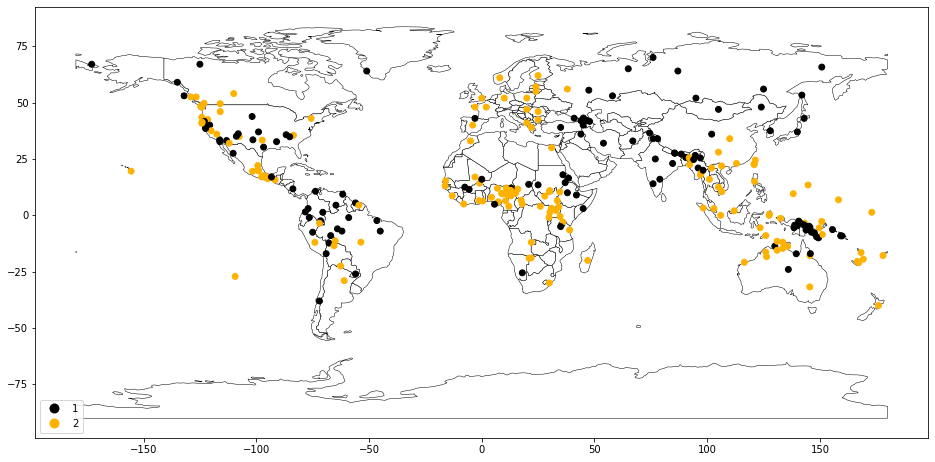

In [39]:
langmap.plot(s280d.langs, labels=c2)

In [40]:
c3 = hierarchy.fcluster(linkage, t=20, criterion='distance')

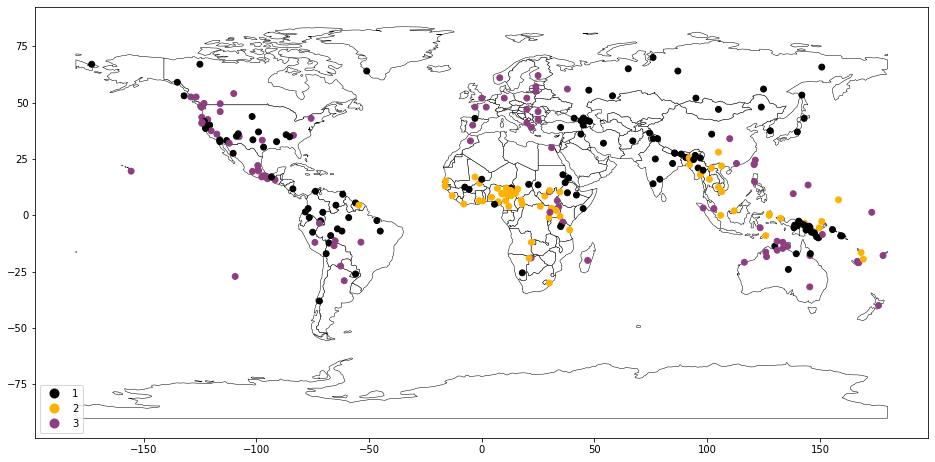

In [41]:
langmap.plot(s280d.langs, labels=c3)

In [42]:
sorted({v3: v2 for v3, v2 in zip(c3, c2)}.items())

[(1, 1), (2, 2), (3, 2)]

In [43]:
c5 = hierarchy.fcluster(linkage, t=13, criterion='distance')

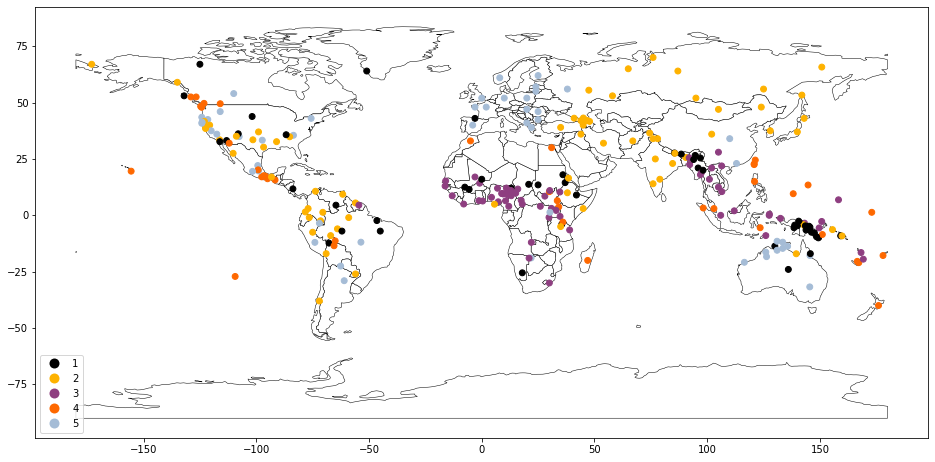

In [44]:
langmap.plot(s280d.langs, labels=c5)

In [45]:
sorted({v5: v3 for v5, v3 in zip(c5, c3)}.items())

[(1, 1), (2, 1), (3, 2), (4, 3), (5, 3)]

In [46]:
c9 = hierarchy.fcluster(linkage, t=10, criterion='distance')

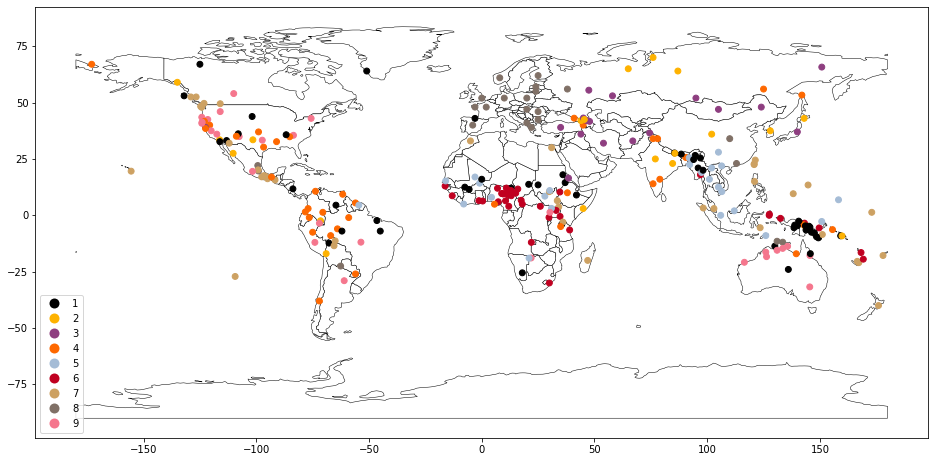

In [47]:
langmap.plot(s280d.langs, labels=c9)

In [48]:
sorted({v9: v2 for v9, v2 in zip(c9, c2)}.items())

[(1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2)]

In [49]:
def most_distinct_features(sample, labels, cluster1, cluster2, count=10):
    values = sample.values_scaled_imputed
    if cluster1 in values.index:
        avg1 = values.loc[cluster1]
    else:
        avg1 = values[labels == cluster1].mean()
    if cluster2 in values.index:
        avg2 = values.loc[cluster2]
    else:
        avg2 = values[labels == cluster2].mean()
    diff = (avg1 - avg2).abs()
    diff_sorted = diff.sort_values(ascending=False)
    if count is None:
        head = diff_sorted[diff_sorted > 0]
    else:
        head = diff_sorted.head(count)
    result = head.to_frame('diff')
    result['shortname'] = result.index.map(walsdata.get_shortname)
    result = result.reindex(['shortname', 'diff'], axis=1)
    result[f'cluster{cluster1}'] = avg1
    result[f'cluster{cluster2}'] = avg2
    return result

In [50]:
def label_for(sample, labels, language):
    return labels[sample.values_scaled_imputed.index.get_loc(language)]

In [51]:
most_distinct_features(s280d, c2, 1, 2)

,shortname,diff,cluster1,cluster2
81A_1,order__sov,0.889712,0.897692,0.007980
83A_1,ov_order__ov,0.877252,0.930233,0.052980
83A_2,ov_order__vo,0.803429,0.031008,0.834437
85A_1,adpositions__postpositions,0.769153,0.906977,0.137824
85A_2,adpositions__prepositions,0.656430,0.031008,0.687438
86A_1,genitives__before_noun,0.646508,0.921004,0.274497
90A_1,relative_clauses__after_noun,0.574564,0.301202,0.875766
81A_2,order__svo,0.520148,0.038760,0.558908
86A_2,genitives__after_noun,0.514740,0.047988,0.562727
69A_2,tense_aspect__suffixes,0.459117,0.824598,0.365481


This lines up pretty well with the existing notion of "head-final" (cluster 1) vs "head-initial" (cluster 2) languages: cluster-1 languages are distinguished by SOV word order, postpositions, and genitives and demonstratives before the noun.

In [52]:
most_distinct_features(s280d, c3, 2, 3)

,shortname,diff,cluster2,cluster3
89A_2,numerals__after_noun,0.709476,0.836066,0.126590
81A_2,order__svo,0.657541,0.950820,0.293279
82A_1,sv_order__sv,0.655556,1.000000,0.344444
89A_1,numerals__before_noun,0.653920,0.163934,0.817855
88A_2,demonstratives__after_noun,0.626736,0.882292,0.255556
88A_1,demonstratives__before_noun,0.622769,0.032787,0.655556
93A_1,content_questions__initial,0.532639,0.098361,0.631000
93A_2,content_questions__non_initial,0.516754,0.819672,0.302918
92A_2,question_particles__final,0.495971,0.605808,0.109837
143A_1,negative_order__before_verb,0.466348,0.386833,0.853180


This seems to split between the more prototypical head-initial languages (SVO, nouns at the beginning of noun phrases) from cluster 3, which is more of a mixed bag (that's where English is).

In [53]:
most_distinct_features(s280d, c5, 1, 2)

,shortname,diff,cluster1,cluster2
89A_2,numerals__after_noun,0.734095,0.879340,0.145245
89A_1,numerals__before_noun,0.711071,0.101792,0.812862
87A_1,adjectives__before_noun,0.584143,0.094340,0.678482
88A_1,demonstratives__before_noun,0.546095,0.396153,0.942248
87A_2,adjectives__after_noun,0.542435,0.811321,0.268886
88A_2,demonstratives__after_noun,0.485519,0.490640,0.005121
33A_2,plurals__suffix,0.352437,0.426710,0.779147
90A_2,relative_clauses__before_noun,0.263464,0.262208,0.525672
143A_4,negative_order__suffix,0.252979,0.207547,0.460526
51A_1,case__suffixes,0.244850,0.355347,0.600197


In [54]:
most_distinct_features(s280d, c5, 4, 5)

,shortname,diff,cluster4,cluster5
82A_2,sv_order__vs,0.799397,0.897436,0.098039
86A_2,genitives__after_noun,0.678529,0.897436,0.218907
69A_2,tense_aspect__suffixes,0.572077,0.164722,0.736800
88A_1,demonstratives__before_noun,0.568627,0.333333,0.901961
33A_2,plurals__suffix,0.564982,0.101560,0.666542
82A_1,sv_order__sv,0.562594,0.025641,0.588235
51A_1,case__suffixes,0.525558,0.101650,0.627208
144A_1,negative_word__initial,0.524194,0.528043,0.003849
81A_3,order__vso,0.492251,0.492251,0.000000
85A_2,adpositions__prepositions,0.476534,0.892208,0.415674


### What's going on with particular languages?

In [55]:
most_distinct_features(s280d, None, 'fre', 'spa', count=None)

,shortname,diff,clusterfre,clusterspa
82A_3,sv_order__mixed,1.0,0.0,1.0
11A_3,front_round__high,1.0,1.0,0.0
144A_3,negative_word__second,1.0,0.0,1.0
143A_6,negative_order__complex,1.0,1.0,0.0
143A_1,negative_order__before_verb,1.0,0.0,1.0
116A_4,polar_questions__word_order,1.0,0.0,1.0
116A_1,polar_questions__particle,1.0,1.0,0.0
92A_1,question_particles__initial,1.0,1.0,0.0
82A_1,sv_order__sv,1.0,1.0,0.0
70A_2,imperative__singular,1.0,1.0,0.0


In [56]:
label_for(s280d, c2, 'eng')

2

In [57]:
label_for(s280d, c2, 'fre')

2

In [58]:
label_for(s280d, c2, 'spa')

2

In [59]:
label_for(s280d, c2, 'jpn')

1

In [60]:
label_for(s280d, c2, 'bsq')

1

In [61]:
label_for(s280d, c2, 'tur')

1

In [62]:
label_for(s280d, c2, 'nav')

1

In [63]:
label_for(s280d, c2, 'haw')

2

In [64]:
label_for(s280d, c2, 'kor')

1

### Saving the cluster labels

In [67]:
def cluster_labels_to_df(sample, colname, labels):
    df = pd.DataFrame(index=sample.values_scaled_imputed.index)
    df[colname] = labels
    return df

In [68]:
def save_clusters(sample, colname, labels):
    df = cluster_labels_to_df(sample, colname, labels)
    df.to_csv(f'{colname}.csv')

In [69]:
save_clusters(s280d, 'cluster2', c2)

In [70]:
save_clusters(s280d, 'cluster3', c3)

In [71]:
save_clusters(s280d, 'cluster5', c5)

In [72]:
save_clusters(s280d, 'cluster9', c9)